0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object
('Female', 109.45)
('Male', 115.25)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           8.56e-08
Time:                

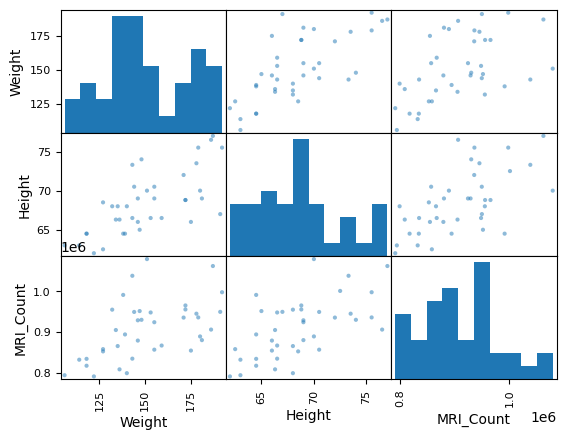

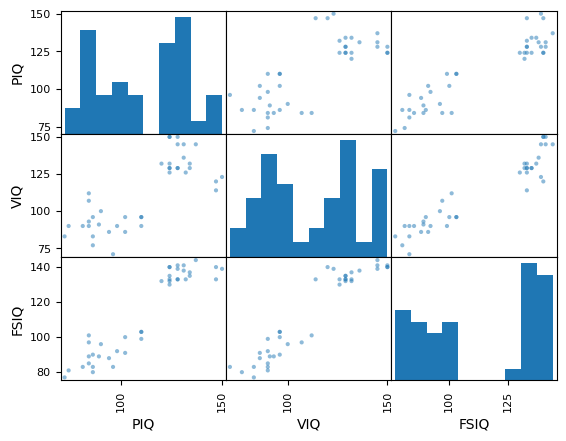

In [24]:
#imports the necessary modules and shorthands for ease of use
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from scipy import stats
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

#read the brain_size.csv and set parameters
data = pd.read_csv('bsgp7030/Stats_Python/brain_size.csv', sep=';', na_values = ".")

#set up numpy arrays
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

#create DataFrame
df = pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

#Returns the # of Columns and Rows in the table
df.shape

#Examines specific columns
data.columns
print(data['Gender'])

#Selector
data[data['Gender'] == 'Female']['VIQ'].mean()

#Split DataFrame to Examine variable
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

#Create a Scatter Matrix for Weight, Height, and MRI_Count
pd.plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

#Create a Scatter Matrix for PIQ, VIQ, and FSIQ
pd.plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

#Get T statistic and p-value for VIQ
stats.ttest_1samp(data['VIQ'], 0)

#2-sample t-test comparing the VIQ between Female and Male
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq,male_viq)

#2-sample test: Are FSIQ and PIQ significantly different?
stats.ttest_ind(data['FSIQ'], data['PIQ'])

#Paired test between FSIQ and PIQ
stats.ttest_rel(data['FSIQ'], data['PIQ'])

#1-sample test of the difference between FSIQ and PSIQ
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

#Wilcoxon signed-rank test
stats.wilcoxon(data['FSIQ'], data['PIQ'])

#Generate simulated data according to the model
x = np.linspace(-5, 5, 20)
np.random.seed(1)
y = -5 + 3*x + 4 * np.random.normal(size=x.shape) #normal distributed noise
data_ols = pd.DataFrame({'x': x, 'y': y}) #Create DataFrame

#Specify and OLS model and fit data
model = ols("y ~ x", data_ols).fit()

#Inspect statistics from fit
print(model.summary())

#Comparison between IQ of male and female using a linear model
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary()) 

#Create a long-form table to compare the different types of IQ
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long)
model = ols("iq ~ type", data_long).fit()
print(model.summary()) 

#Retrieve T test and p values
stats.ttest_ind(data['FSIQ'], data['PIQ'])

#read iris.csv
data_iris = pd.read_csv('bsgp7030/Stats_Python/iris.csv')

#Create model
model_iris = ols('sepal_width ~ name + petal_length', data).fit()
print(model_iris.summary()) 

#F-test of iris data
print(model_iris.f_test([0, 1, -1, 0]))

